In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Introduction
For a given sequence of observations $\{(x_i, y_i)\}^n_{i=1}$, we want to find some $f:\mathbb R\rightarrow \mathbb R$ s.t. $f(x_i) = y_i$ or in some cases $f(x_i) \approx y_i$. The approximation can be defined as Least square approximation $\arg\min_f\|f(x_i) - y_i\|$, where $f$ belongs to some group of functions (say we want to fit a line). 

#### Usages in Numerical Methods
 - Newton's method
 - Integrals: for some $f$ that is hard to find integral, find some polynomial $p\rightarrow^{p.w.} f$. 

###  Polynomial Interpolations
Given $\{(x_i,y_i)\}_{i=1}^n$, WTF $f(x) = \sum_{i=1}^n c_i \phi_i(x)$, i.e. 
$$\underset{A}{\begin{bmatrix}
\phi_1(x_i)&...&\phi_n(x_1)\\
\vdots &\ddots&\vdots\\
\phi_1(x_n)&...&\phi_n(x_n)
\end{bmatrix}}
\underset{c}{\begin{bmatrix}
c_1\\\vdots\\c_n\end{bmatrix}} 
= 
\underset{y}{\begin{bmatrix}
y_1\\\vdots\\y_n\end{bmatrix}}
$$

If $A$ is nonsingular, then always a unique solution to $f(x_i) = y_i$

##### Monomial Basis
If we let $\phi_i(x) = x^{i-1}$, then $f(x) = p(x) = \sum_{i=0}^N c_i x^i$ s.t. $p(x_i) = y_i$ and we have 
$$A = \begin{bmatrix}
1&x_1&...&x_1^{n-1}\\
\vdots&\vdots &\ddots&\vdots\\
1&x_n&...&x_n^{n-1}
\end{bmatrix}=:\text{Vandermonde Matrix}$$
Note that $A$ is non-sigular if $x_i$'s are distinct. 

__Proposition__ Given $A$ is non-singular, then $Ac =0$ IFF $c=0$  

_proof_. Define $p(x_j) := \sum_{i=1}^n c_i x_j^{i-1} = 0$ for $j = 1,...,n$. $p(x)$ is a polynomial of degree $n-1$.  
By fundamental theorem of algebra, if at least one $c_i \neq 0$ then $p(x)$ has at most $n-1$ roots. 

#### Example
Find a quadratic $p(x) = c_1 + c_2 x + c_3 x^2$ s.t. $p(-2) = -27, p(0) = -1, p(1) = 0$
Then we construct $A = \begin{bmatrix} 1&(-2)^1&(-2)^2\\1&0&0^2\\1&1&1^2\end{bmatrix} = \begin{bmatrix} 1&-2&4\\1&0&0\\1&1&1\end{bmatrix}, y = \begin{bmatrix}-27\\-1\\0\end{bmatrix}$

In [33]:
x = np.array([-2, 0, 1])
y = np.array([-27, -1, 0])

def find_fit(x, y):
    A = np.empty((x.shape[0], x.shape[0]))
    for i in range(A.shape[0]):
        A[:, i] = x ** i
    c = np.linalg.solve(A, y)
    return c
c = find_fit(x, y)
print("y = " + " + ".join([str(c[i]) + "x^" + str(i) for i in range(c.shape[0])]))

y = -0.9999999999999982x^0 + 4.999999999999999x^1 + -4.000000000000001x^2


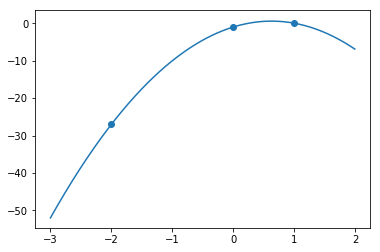

In [31]:
xl = np.arange(-3, 2, 0.01)
yl = sum([c[i] * (xl ** i) for i in range(c.shape[0])])
plt.plot(xl, yl)
plt.scatter(x, y);

#### Conditioning
Often Vandermonde Matrices are very badly conditioned. When $x_1\neq x_2$ but $x_1\approx x_2$, then first two rows of $A$ are almost identical, resulting close to singular and bad conditioning. 

#### Properties of Polynomials
 - easy differentiation and integral
 - efficient evaluation

We can evaluate by 

```python
p = c[0]
x_k = 1
for k in range(1, n):
    x_k *= x
    p += c[k] * x_k
```
 
 Or we can even improve by noticing that $p(x) = c_0 + c_1x + c_2x^2 = c_0 + (c_1 + x(c_2 + x))$

```python
p = c[n]
for k in range(n-1, 0, -1):
    p = c[k] + x * p
```

### Lagrange Form of the Interpolation Polynomial
WTF $p(x_i) = y_i$ for $i = 1, 2,...,n$ and $p$ has $n-1$ degree. $x_i$ are distinct. 

Define the Lagrange basis functions 
$$l_j(x) = \prod_{i=0, i\neq j}^n \frac{x-x_i}{x_j-x_i}$$
Note that $l_j(x_i) = \mathbb I(i=j)$
Then $p(x) = \sum_{j=1}^n l_j(x)y_j$